# Install some packages

To run some signal processing samples, you may need to install:

<code>pip install/ pip3 install</code>

* brainflow
* matplotlib
* pandas
* numpy
* mne
* scipy
* pyqtgraph


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.signal import find_peaks
from scipy.fftpack import fft,ifft

In [2]:
from brainflow.board_shim import BoardShim, BrainFlowInputParams, LogLevels, BoardIds
from brainflow.data_filter import DataFilter, FilterTypes, AggOperations, WindowFunctions, NoiseTypes, DetrendOperations
from brainflow.ml_model import MLModel, BrainFlowMetrics, BrainFlowClassifiers, BrainFlowModelParams

import mne
from mne.channels import read_layout

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Read and plot data

## example data - 8 channels

For the stored EEG txt file, for now, I only know those following columns(in total 24 columns):



* index
* ch1 - ch8  channels data
* accelerometer X Y Z
* 10 <<0.0>> data(perhaps other 8 channels data and ..)
* TimeStamp
* Time


In [4]:
openbci_datapath = './data/OpenBCI_GUI-v5-meditation.txt'
openbci_datapath_2 = './data/OpenBCI_GUI-v5-blinks-jawClench-alpha.txt'

names=['index', 'ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'X_acc', 'Y_acc', 'Z_acc',
       'unknow1','unknow2','unknow3','unknow4','unknow5','unknow6','unknow7','unknow8','unknow9','unknow10',
       'TimeStamp', 'Time']
usecols=['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'TimeStamp']

# you can also start from line 5, because the 6th line is all 0.0
data = pd.read_csv(openbci_datapath, sep=",", header=6, index_col=False, names=names)
print("OpenBCI data shape: ", data.shape)

OpenBCI data shape:  (175951, 24)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175951 entries, 0 to 175950
Data columns (total 24 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   index      175951 non-null  int64  
 1   ch1        175951 non-null  float64
 2   ch2        175951 non-null  float64
 3   ch3        175951 non-null  float64
 4   ch4        175951 non-null  float64
 5   ch5        175951 non-null  float64
 6   ch6        175951 non-null  float64
 7   ch7        175951 non-null  float64
 8   ch8        175951 non-null  float64
 9   X_acc      175951 non-null  float64
 10  Y_acc      175951 non-null  float64
 11  Z_acc      175951 non-null  float64
 12  unknow1    175951 non-null  float64
 13  unknow2    175951 non-null  float64
 14  unknow3    175951 non-null  float64
 15  unknow4    175951 non-null  float64
 16  unknow5    175951 non-null  float64
 17  unknow6    175951 non-null  float64
 18  unknow7    175951 non-null  float64
 19  unknow8    175951 non-n

In [6]:
data.describe()

,index,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,X_acc,...,unknow2,unknow3,unknow4,unknow5,unknow6,unknow7,unknow8,unknow9,unknow10,TimeStamp
count,175951.000000,175951.000000,175951.000000,175951.000000,175951.000000,175951.000000,175951.000000,175951.000000,175951.000000,175951.000000,...,175951.0,175951.0,175951.0,175951.0,175951.0,175951.0,175951.0,175951.0,175951.0,1.759510e+05
mean,127.462043,43095.831459,37632.102670,-20979.869211,-23588.500417,-10190.563645,-23396.634828,-6897.845708,-1796.286727,0.003354,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.557937e+12
std,73.905882,711.960035,447.865981,1128.639346,1208.353692,1593.851709,1034.345921,1899.123753,1325.763340,0.011629,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.029714e+05
min,0.000000,28817.010000,22731.030000,-23080.990000,-26289.760000,-13252.620000,-25385.460000,-10275.750000,-4007.690000,-0.036000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.557937e+12
25%,63.000000,42675.020000,37423.020000,-21809.090000,-24376.950000,-11509.975000,-24264.215000,-8442.160000,-2901.060000,-0.004000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.557937e+12
50%,127.000000,42890.070000,37750.780000,-20976.870000,-23271.050000,-10132.430000,-23391.190000,-6962.230000,-1805.100000,0.002000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.557937e+12
75%,191.000000,43330.160000,37898.230000,-20074.865000,-22593.460000,-8794.865000,-22528.720000,-5284.645000,-587.460000,0.008000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.557937e+12
max,255.000000,46157.870000,38309.320000,-17919.100000,-19491.620000,-7041.090000,-21013.680000,-3305.090000,812.930000,0.060000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.557938e+12


In [7]:
data.head()

,index,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,X_acc,...,unknow3,unknow4,unknow5,unknow6,unknow7,unknow8,unknow9,unknow10,TimeStamp,Time
0,2,46077.20,37578.29,-22259.92,-26035.54,-12632.74,-24711.80,-9977.57,-3650.20,0.014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1557936889071,12:14:49.071
1,3,46157.87,37690.05,-22231.69,-25992.17,-12616.84,-24741.10,-9976.90,-3649.79,0.014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1557936889079,12:14:49.079
2,4,46112.07,37644.58,-22285.94,-26075.70,-12653.59,-24794.54,-10017.76,-3706.21,0.014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1557936889079,12:14:49.079
3,5,46002.86,37500.39,-22366.29,-26191.93,-12712.46,-24778.41,-10044.25,-3734.91,0.014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1557936889089,12:14:49.089
4,6,46049.98,37543.73,-22284.44,-26075.61,-12649.50,-24716.38,-9982.60,-3659.38,0.014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1557936889089,12:14:49.089


In [8]:
# choose the columns useful
df_selected = data[usecols]

In [9]:
df_selected.shape

(175951, 9)

# Official Functions

## Three useful functions

Define the following params

In [10]:
# Cyton Daisy Board
board_id = 2  

In [11]:
eeg_channels = BoardShim.get_eeg_channels(board_id)
ch_names = BoardShim.get_eeg_names(board_id)
sfreq = BoardShim.get_sampling_rate(board_id)
print("EEG channel number", eeg_channels)
print("EEG channel name", ch_names)
print('Board sampling rate', sfreq)

EEG channel number [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
EEG channel name ['Fp1', 'Fp2', 'C3', 'C4', 'P7', 'P8', 'O1', 'O2', 'F7', 'F8', 'F3', 'F4', 'T7', 'T8', 'P3', 'P4']
Board sampling rate 125


but in our testing example, the channel number is 8, maybe a Cyton board

In [12]:
# Cyton board
board_id = 0

In [13]:
eeg_channels = BoardShim.get_eeg_channels(board_id)
ch_names = BoardShim.get_eeg_names(board_id)
sfreq = BoardShim.get_sampling_rate(board_id)
print("EEG channel number", eeg_channels)
print("EEG channel name", ch_names)
print('Board sampling rate', sfreq)

EEG channel number [1, 2, 3, 4, 5, 6, 7, 8]
EEG channel name ['Fp1', 'Fp2', 'C3', 'C4', 'P7', 'P8', 'O1', 'O2']
Board sampling rate 250


for the following test, the index start from 0-7 not 1-8

In [14]:
eeg_channels = [0, 1, 2, 3, 4, 5, 6, 7]
sample_rate = sampling_rate =  250

## Time length

In [15]:
Timestamps = (df_selected['TimeStamp'].to_numpy() - df_selected['TimeStamp'].to_numpy()[0])/1000
# print("Timestamps shape: ", Timestamps.shape)
print("Total length of data: ", Timestamps[-1], 's')

Total length of data:  703.108 s


## Plot all data

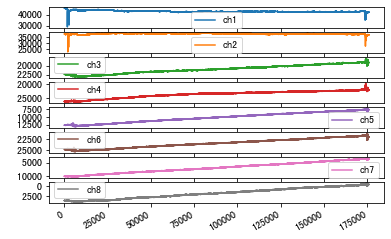

In [24]:
EEG_data = df_selected[['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8']]
df = pd.DataFrame(EEG_data)
df[['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8']].plot(subplots=True, figsize=(12, 6))
plt.show()

EEG data shape:  (175951, 8)


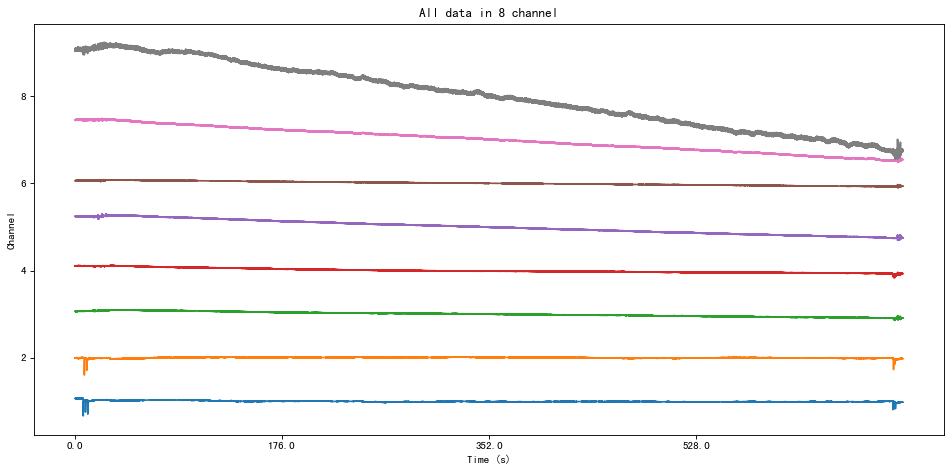

In [26]:
EEG_data = df_selected[['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8']].to_numpy()
print("EEG data shape: ", EEG_data.shape)

plt.figure(figsize=(12, 6), dpi=80)
for i in range(EEG_data.shape[1]):
    plt.plot(EEG_data[:,i]/np.mean(EEG_data[:,i])+i)
plt.xticks(ticks=np.arange(0, round(Timestamps[-1]+1)*sample_rate, round(Timestamps[-1]+1)*sample_rate/4), 
           labels=np.arange(0, round(Timestamps[-1]+1),round(Timestamps[-1]+1)/4))
# plt.yticks(ticks=np.arange(0,8))
plt.xlabel('Time (s)')
plt.ylabel('Channel')
plt.title("All data in 8 channel")
plt.tight_layout()
plt.show()

Info: 
In the text file, data is uV, convert to V

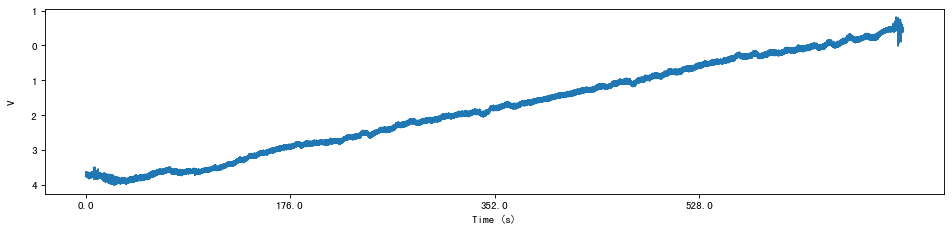

In [46]:
plt.figure(figsize=(12, 3), dpi=80)

plt.plot(EEG_data[:,-1]/1000, label='Channel_8')
plt.xticks(ticks=np.arange(0, round(Timestamps[-1]+1)*sample_rate, round(Timestamps[-1]+1)*sample_rate/4), 
           labels=np.arange(0, round(Timestamps[-1]+1),round(Timestamps[-1]+1)/4))
plt.xlabel('Time (s)')
plt.ylabel("V")
plt.tight_layout()
plt.show()

plot the EEG signal in a small windows

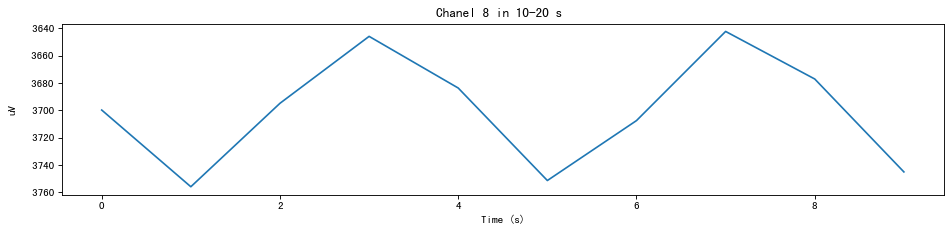

In [32]:
plt.figure(figsize=(12, 3), dpi=80)
plt.plot(EEG_data[10:20,-1])
plt.xlabel('Time (s)')
plt.title("Chanel 8 in 10-20 s ")
plt.ylabel("uV")
plt.tight_layout()
plt.show()

In our real experiment, we need to locate which windows data are the data we will use

There are two ways to do it:

1. Use median or other statistical data(data change) to choose useful data.
2. Like the EEG official experiment, use the images in a video to control the time, then locate the data.

## Downsample Data

demo for downsampling, it doesnt apply lowpass filter for you, it just aggregates several data points

The first parameter is data, second one is window, in this period you do the aggregation operations
MEAN= 0    MEDIAN= 1    EACH= 2

PS: ''EACH'' will choose the last period data to present this period

In [41]:
# each  /  dawnsample plot   3 plot for a channel
for count, channel in enumerate(eeg_channels):
    # print('Original data for channel %d:' % channel)
    # print(EEG_data[:,channel].shape)
    if count == 0:
        downsampled_data = DataFilter.perform_downsampling(EEG_data[:,channel], 3, AggOperations.MEDIAN.value)
    elif count == 1:
        downsampled_data = DataFilter.perform_downsampling(EEG_data[:,channel], 2, AggOperations.MEAN.value)
    else:
        downsampled_data = DataFilter.perform_downsampling(EEG_data[:,channel], 3, AggOperations.EACH.value)
    print('Downsampled data for channel %d:' % channel, end="")
    print("\t Original data shape: ",EEG_data[:,channel].shape, "\t Dawnsampling data shape",downsampled_data.shape)

Downsampled data for channel 0:	 Original data shape:  (175951,) 	 Dawnsampling data shape (58650,)
Downsampled data for channel 1:	 Original data shape:  (175951,) 	 Dawnsampling data shape (87975,)
Downsampled data for channel 2:	 Original data shape:  (175951,) 	 Dawnsampling data shape (58650,)
Downsampled data for channel 3:	 Original data shape:  (175951,) 	 Dawnsampling data shape (58650,)
Downsampled data for channel 4:	 Original data shape:  (175951,) 	 Dawnsampling data shape (58650,)
Downsampled data for channel 5:	 Original data shape:  (175951,) 	 Dawnsampling data shape (58650,)
Downsampled data for channel 6:	 Original data shape:  (175951,) 	 Dawnsampling data shape (58650,)
Downsampled data for channel 7:	 Original data shape:  (175951,) 	 Dawnsampling data shape (58650,)


In [45]:
test_num = 3
windows = 3 # cannot change unless you change the param above
print(downsampled_data[test_num])
print(EEG_data[(test_num-1)*windows:test_num*windows,-1]) # last channel

-3755.92
[-3705.92 -3743.56 -3672.82]


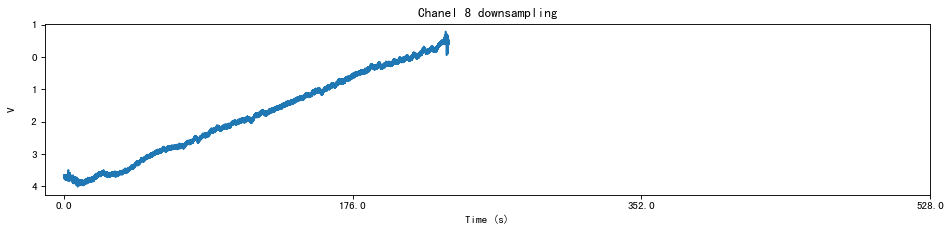

In [49]:
plt.figure(figsize=(12, 3), dpi=80)

plt.plot(downsampled_data/1000, label='Channel_8')
plt.xticks(ticks=np.arange(0, round(Timestamps[-1]+1)*sample_rate, round(Timestamps[-1]+1)*sample_rate/4), 
           labels=np.arange(0, round(Timestamps[-1]+1),round(Timestamps[-1]+1)/4))
plt.xlabel('Time (s)')
plt.ylabel("V")
plt.title("Chanel 8 downsampling")
plt.tight_layout()
plt.show()

## Transforms 


* Wavelet  https://en.wikipedia.org/wiki/Wavelet_transform

* FFT https://fr.wikipedia.org/wiki/FFT

### Wavelet

* An explain in chinese https://www.jianshu.com/p/6861539f6c3f
* https://fr.mathworks.com/help/wavelet/gs/introduction-to-the-wavelet-families.html

the second param is supported type of wavelet(str), the third param is decomposition level(int)
<code>db1..db15,haar,sym2..sym10,coif1..coif5,bior1.1,bior1.3,bior1.5,bior2.2,bior2.4,bior2.6,bior2.8,bior3.1,bior3.3,bior3.5 ,bior3.7,bior3.9,bior4.4,bior5.5,bior6.8</code>


![Wavelet-families-and-subsets](./data/img_notebook/Wavelet-families-and-subsets.png)

![A-sample-of-different-wavelet-families-provided-by-a-toolkit-in-MATLAB-53](./data/img_notebook/A-sample-of-different-wavelet-families-provided-by-a-toolkit-in-MATLAB-53.png)

In [69]:
for count, channel in enumerate(eeg_channels):

    # wavelet_coeffs format is[A(J) D(J) D(J-1) ..... D(1)] where J is decomposition level, A - app coeffs, D - detailed coeffs
    # lengths array stores lengths for each block
    wavelet_coeffs, lengths = DataFilter.perform_wavelet_transform(EEG_data[:,channel], 'db5', 3)
    app_coefs = wavelet_coeffs[0: lengths[0]]
    detailed_coeffs_first_block = wavelet_coeffs[lengths[0]: lengths[1]]
    # print(len(wavelet_coeffs), lengths)
    
    # you can do smth with wavelet coeffs here, for example denoising works via thresholds 
    # for wavelets coefficients
    restored_data = DataFilter.perform_inverse_wavelet_transform((wavelet_coeffs, lengths), EEG_data[:,channel].shape[0],
                                                                 'db5', 3)
    print('Restored data after wavelet transform for channel %d:' % channel, end="   ")
    print("\t Original data shape: ",EEG_data[:,channel].shape, "\t Wavelet transform data shape",restored_data.shape)


#     # demo for fft, len of data must be a power of 2
#     print(len(EEG_data[:,channel]), EEG_data[:,channel].shape[0]**0.5)
#     fft_data = DataFilter.perform_fft(EEG_data[:,channel][1:], WindowFunctions.NO_WINDOW.value)
#     # len of fft_data is N / 2 + 1
#     restored_fft_data = DataFilter.perform_ifft(fft_data)
#     print('Restored data after fft for channel %d:' % channel)
#     print(restored_fft_data)

Restored data after wavelet transform for channel 0:   	 Original data shape:  (175951,) 	 Wavelet transform data shape (175951,)
Restored data after wavelet transform for channel 1:   	 Original data shape:  (175951,) 	 Wavelet transform data shape (175951,)
Restored data after wavelet transform for channel 2:   	 Original data shape:  (175951,) 	 Wavelet transform data shape (175951,)
Restored data after wavelet transform for channel 3:   	 Original data shape:  (175951,) 	 Wavelet transform data shape (175951,)
Restored data after wavelet transform for channel 4:   	 Original data shape:  (175951,) 	 Wavelet transform data shape (175951,)
Restored data after wavelet transform for channel 5:   	 Original data shape:  (175951,) 	 Wavelet transform data shape (175951,)
Restored data after wavelet transform for channel 6:   	 Original data shape:  (175951,) 	 Wavelet transform data shape (175951,)
Restored data after wavelet transform for channel 7:   	 Original data shape:  (175951,) 	

The coefficients of the wavelet transform are usually meaningless for analyzing the signal, and sometimes they are imaginary numbers, which cannot even become a graph. Only through reconstruction (inverse wavelet transform) can they become meaningful results.

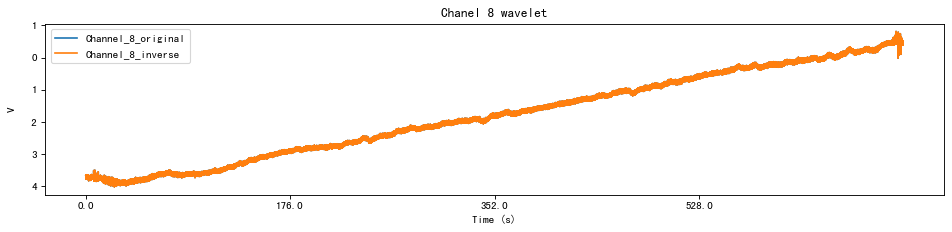

In [70]:
plt.figure(figsize=(12, 3), dpi=80)

plt.plot(EEG_data[:,-1]/1000, label='Channel_8_original')
# plt.plot(wavelet_coeffs/1000, label='Channel_8_transform_wavelet')
plt.plot(restored_data/1000, label='Channel_8_inverse')
plt.xticks(ticks=np.arange(0, round(Timestamps[-1]+1)*sample_rate, round(Timestamps[-1]+1)*sample_rate/4), 
           labels=np.arange(0, round(Timestamps[-1]+1),round(Timestamps[-1]+1)/4))
plt.xlabel('Time (s)')
plt.ylabel("V")
plt.title("Chanel 8 wavelet")
plt.legend()
plt.tight_layout()
plt.show()

In [72]:
arr1 = restored_data
arr2 = EEG_data[:,-1]
print((arr1 == arr2).all())

False


### Other FFT

The commented code does not work because the length is not a power of 2; so we need a new FFT

In [74]:
def FFT (Fs, data):
    L = len (data)                        # signal length
    N = np.power(2,np.ceil(np.log2(L)))    # next nearest number which is a power of 2
    N = int(N)
    FFT_y1 = np.abs(fft(data,N))/L*2      # N point FFT, but under the length of signal
    Fre = np.arange(int(N/2))*Fs/N        # frequency position
    FFT_y1 = FFT_y1[range(int(N/2))]      # take a half
    return Fre, FFT_y1

In [75]:
for count, channel in enumerate(eeg_channels):
  
    fre, fft_y=FFT(sample_rate,EEG_data[:,channel])                          
    print('Restored data after FFT transform for channel %d:' % channel, end='   ')
    # print(EEG_data[:,channel])
    # print(fft_y)
    print("\t Original data shape: ",EEG_data[:,channel].shape, "\t FFT transform data shape",fft_y.shape)

Restored data after FFT transform for channel 0:   	 Original data shape:  (175951,) 	 FFT transform data shape (131072,)
Restored data after FFT transform for channel 1:   	 Original data shape:  (175951,) 	 FFT transform data shape (131072,)
Restored data after FFT transform for channel 2:   	 Original data shape:  (175951,) 	 FFT transform data shape (131072,)
Restored data after FFT transform for channel 3:   	 Original data shape:  (175951,) 	 FFT transform data shape (131072,)
Restored data after FFT transform for channel 4:   	 Original data shape:  (175951,) 	 FFT transform data shape (131072,)
Restored data after FFT transform for channel 5:   	 Original data shape:  (175951,) 	 FFT transform data shape (131072,)
Restored data after FFT transform for channel 6:   	 Original data shape:  (175951,) 	 FFT transform data shape (131072,)
Restored data after FFT transform for channel 7:   	 Original data shape:  (175951,) 	 FFT transform data shape (131072,)


In real test, we can just take a small window data and make sure it is a power of two, otherwise add 0

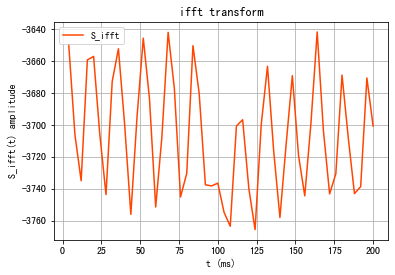

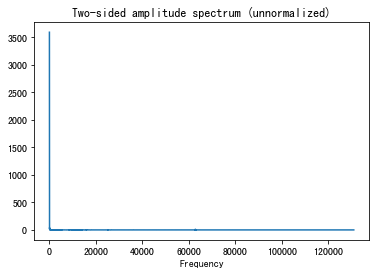

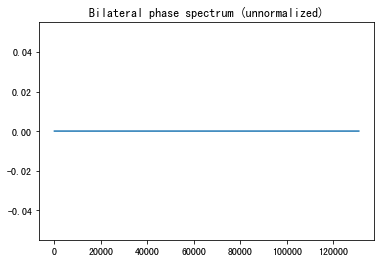

In [88]:
abs_y=np.abs(fft_y)                
angle_y=np.angle(fft_y)    

T = 1/sample_rate
t = np.array([i*T for i in range(131072)])
complex_array = fft.fft(EEG_data[:131072,-1])
S_ifft = fft.ifft(complex_array)
plt.plot(1000*t[1:51], S_ifft[1:51], label='S_ifft', color='orangered')
plt.xlabel("t (ms)")
plt.ylabel("S_ifft(t) amplitude")
plt.title("ifft transform")
plt.grid()
plt.legend()
plt.show()

plt.figure()
plt.plot(abs_y)
plt.xlabel('Frequency')
plt.title('Two-sided amplitude spectrum (unnormalized)')

plt.figure()
plt.plot(angle_y) 
plt.title('Bilateral phase spectrum (unnormalized)')
plt.show()

## Signal Filtering 

for demo apply different filters to different channels, in production choose one

In [91]:
# help(DataFilter.remove_environmental_noise)
# help(NoiseTypes)

* FilterTypes.BESSEL  https://en.wikipedia.org/wiki/Bessel_filter
* FilterTypes.BUTTERWORTH  https://en.wikipedia.org/wiki/Butterworth_filter
* FilterTypes.CHEBYSHEV_TYPE_1 https://en.wikipedia.org/wiki/Chebyshev_filter

* perform_bandpass           apply band pass filter to provided data
* perform_bandstop           apply band stop filter to provided data
* perform_rolling_filter       smooth data using moving average or median
* perform_lowpass            apply low pass filter to provided data
* perform_highpass           apply high pass filter to provided data
* remove_environmental_noise     remove env noise using notch filter

<Figure size 960x480 with 0 Axes>

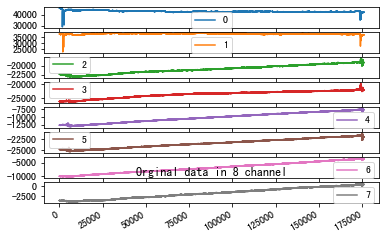

<Figure size 960x480 with 0 Axes>

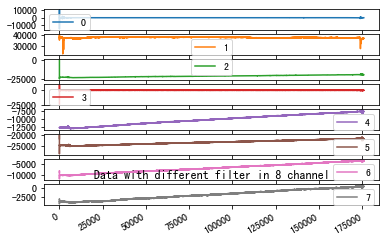

In [92]:
df = pd.DataFrame(EEG_data)
df[eeg_channels].plot(subplots=True, figsize=(12, 6))
plt.title("Orginal data in 8 channel")
plt.show()
# plt.savefig('before_processing.png')

# EEG_data_filter = EEG_data.copy()
EEG_data_filter = np.transpose(EEG_data)

for count, channel in enumerate(eeg_channels):
    # filters work in-place
    if count == 0:
        DataFilter.perform_bandpass(EEG_data_filter[channel,:], sample_rate, 15.0, 6.0, 4,
                                    FilterTypes.BESSEL.value, 0)
    elif count == 1:
        DataFilter.perform_bandstop(EEG_data_filter[channel, :], sample_rate, 30.0, 1.0, 3,
                                    FilterTypes.BUTTERWORTH.value, 0)
    elif count == 2:
        DataFilter.perform_lowpass(EEG_data_filter[channel, :], sample_rate, 20.0, 5,
                                   FilterTypes.CHEBYSHEV_TYPE_1.value, 1)
    elif count == 3:
        DataFilter.perform_highpass(EEG_data_filter[channel, :], sample_rate, 3.0, 4,
                                    FilterTypes.BUTTERWORTH.value, 0)
    elif count == 4:
        DataFilter.perform_rolling_filter(EEG_data_filter[channel, :], 3, AggOperations.MEAN.value)
    else:
        DataFilter.remove_environmental_noise(EEG_data_filter[channel, :], sample_rate, NoiseTypes.FIFTY.value)

df = pd.DataFrame(np.transpose(EEG_data_filter))
df[eeg_channels].plot(subplots=True, figsize=(12, 6))
plt.title('Data with different filter in 8 channel')
plt.show()
# plt.savefig('after_processing_filter.png')

## Denoising

demo for denoising, apply different methods to different channels 

* perform_wavelet_denoising   perform wavelet denoising
* perform_rolling_filter

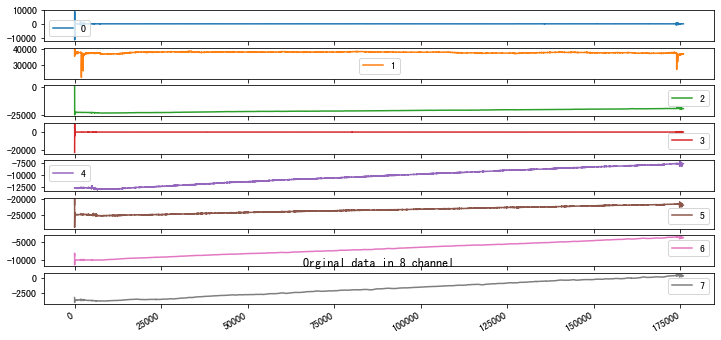

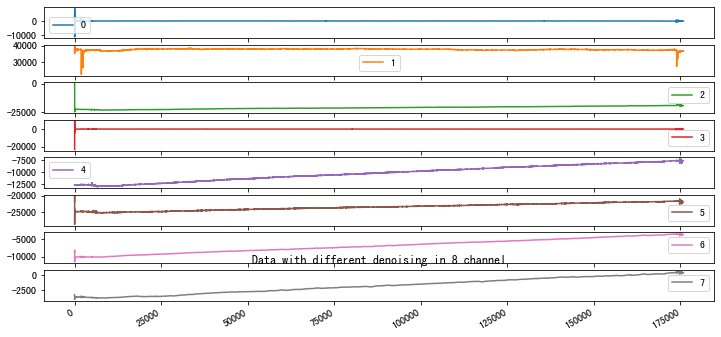

In [99]:
df = pd.DataFrame(EEG_data)
df[eeg_channels].plot(subplots=True, figsize=(12, 6))
plt.title("Orginal data in 8 channel")
plt.show()

EEG_data_denoising = np.transpose(EEG_data)

for count, channel in enumerate(eeg_channels):
    # first of all you can try simple moving median or moving average with different window size
    if count == 0:
        DataFilter.perform_rolling_filter(EEG_data_denoising[channel, :], 3, AggOperations.MEAN.value)
    elif count == 1:
        DataFilter.perform_rolling_filter(EEG_data_denoising[channel, :], 3, AggOperations.MEDIAN.value)
    # if methods above dont work for your signal you can try wavelet based denoising
    # feel free to try different functions and decomposition levels
    elif count == 2:
        DataFilter.perform_wavelet_denoising(EEG_data_denoising[channel, :], 'db6', 3)
    elif count == 3:
        DataFilter.perform_wavelet_denoising(EEG_data_denoising[channel, :], 'bior3.9', 3)
    elif count == 4:
        DataFilter.perform_wavelet_denoising(EEG_data_denoising[channel, :], 'sym7', 3)
    elif count == 5:
        # with synthetic board this one looks like the best option, but it depends on many circumstances
        DataFilter.perform_wavelet_denoising(EEG_data_denoising[channel, :], 'coif3', 3)
    elif count == 6:
        DataFilter.perform_wavelet_denoising(EEG_data_denoising[channel, :], 'bior6.8', 5)
    elif count == 7:
        DataFilter.perform_wavelet_denoising(EEG_data_denoising[channel, :], 'db4', 5)

df = pd.DataFrame(np.transpose(EEG_data_denoising))
df[eeg_channels].plot(subplots=True, figsize=(12, 6))
plt.title('Data with different denoising in 8 channel')
plt.show()
# plt.savefig('after_processing_denoising.png')

## MNE Itegration

power spectral density, PSD

* https://en.wikipedia.org/wiki/Spectral_density
* https://mne.tools/stable/generated/mne.viz.plot_raw_psd.html
* https://mne.tools/0.16/auto_examples/time_frequency/plot_compute_raw_data_spectrum.html

Creating RawArray with float64 data, n_channels=8, n_times=175951
    Range : 0 ... 175950 =      0.000 ...   703.800 secs
Ready.
Effective window size : 8.192 (s)


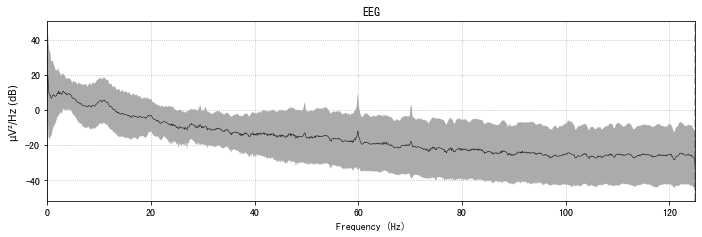

In [100]:
eeg_data = np.transpose(EEG_data)
eeg_data = eeg_data[eeg_channels, :]

# BrainFlow returns uV, convert to V for MNE
eeg_data = eeg_data / 1000000  


# Creating MNE objects from brainflow data arrays
ch_types = ['eeg'] * len(eeg_channels)
# ch_names = ['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8']
sfreq = 250
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(eeg_data, info)

raw.plot_psd(average=True)
plt.show()
# plt.savefig('psd.png')

## Band Power

In [103]:
eeg_channels = BoardShim.get_eeg_channels(0)
# use first eeg channel for demo
# second channel of synthetic board is a sine wave at 10 Hz, should see big 'alpha'
eeg_channel = eeg_channels[1]
print(eeg_channels, eeg_channel)

[1, 2, 3, 4, 5, 6, 7, 8] 2


In [104]:
# optional: detrend
EEG_data_BP = np.transpose(EEG_data)

DataFilter.detrend(EEG_data_BP[eeg_channel-1, :], DetrendOperations.LINEAR.value)

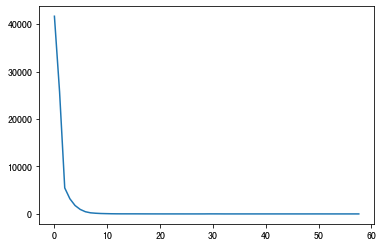

In [105]:
nfft = DataFilter.get_nearest_power_of_two(sample_rate)
psd = DataFilter.get_psd_welch(EEG_data_BP[eeg_channel-1, :], nfft, nfft // 2, sampling_rate, WindowFunctions.HANNING.value)
plt.plot(psd[1][:60], psd[0][:60])
plt.show()

In [106]:
# calc band power
alpha = DataFilter.get_band_power(psd, 7.0, 13.0)
beta = DataFilter.get_band_power(psd, 14.0, 30.0)
print("Alpha/Beta Ratio is: %f" % (alpha / beta))

Alpha/Beta Ratio is: 3.951916


In [108]:
# fail test if ratio is not smth we expect
# if (band_power_alpha / band_power_beta < 100):
#     raise ValueError('Wrong Ratio')

## EEG metrcs

use avg band power to judge if concentration or relaxation by the ml model

In [110]:
eeg_channels = [0, 1, 2, 3, 4, 5, 6, 7]
eeg_data = np.transpose(EEG_data)
bands = DataFilter.get_avg_band_powers(eeg_data, eeg_channels, sample_rate, True)
feature_vector = np.concatenate((bands[0], bands[1]))
print(feature_vector)

[7.60962397e-01 1.81478644e-01 4.35915556e-02 1.26523805e-02
 1.31502329e-03 2.58764937e+00 2.47778712e+00 1.57641047e+00
 1.72546364e+00 1.46561145e+00]


In [112]:
bands

(array([0.7609624 , 0.18147864, 0.04359156, 0.01265238, 0.00131502]),
 array([2.58764937, 2.47778712, 1.57641047, 1.72546364, 1.46561145]))

In [111]:
# calc concentration
concentration_params = BrainFlowModelParams(BrainFlowMetrics.CONCENTRATION.value, BrainFlowClassifiers.KNN.value)
concentration = MLModel(concentration_params)
concentration.prepare()
print('Concentration: %f' % concentration.predict(feature_vector))
concentration.release()

# calc relaxation
relaxation_params = BrainFlowModelParams(BrainFlowMetrics.RELAXATION.value, BrainFlowClassifiers.REGRESSION.value)
relaxation = MLModel(relaxation_params)
relaxation.prepare()
print('Relaxation: %f' % relaxation.predict(feature_vector))
relaxation.release()

Concentration: 0.000000
Relaxation: 0.999787


# To be continued

For now, I tried all code in BrainFlow.
But for the application GUI, there are still two functions are not redo.

## The head plot

* http://openbci.com/forum/index.php?p=/discussion/comment/4158/#Comment_4158
* https://github.com/OpenBCI/OpenBCI_Processing/blob/master/OpenBCI_GUI/HeadPlot.pde
* https://openbci.com/forum/index.php?p=/discussion/416/understanding-the-gui-in-action

head diagram lights up with a rough estimate of the amplitude coming in at that numbered channel. Note the channel to 10-20 location assignments shown are not necessarily what you have used yourself.

dark red is indicating RAILED or out of range. And the working electrodes are "averaged" into a kind of "heat map" using a color scale ranging in shades from blue to white to red. So depending on the overall range of your channel amplitudes, you could see any shade in that range.

## The band power

we will do it in next jupyter notebook.